In [15]:
from impedance import preprocessing
import numpy as np

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('./YSZ_Si_T290ohm_C01_3.csv')


#Change the sign of the imaginary part
Z  = Z.real - 1j * Z.imag  # This flips the sign of the imaginary part

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

For this dataset which simply contains impedance data in three columns (frequency, Z_real, Z_imag)

In [121]:
from impedance.models.circuits import CustomCircuit

# https://impedancepy.readthedocs.io/en/latest/circuit-elements.html

circuit = 'R0-p(R1,C1)-p(R2,C2)'
initial_guess = [1, 500000, 5e-7, 1000006, 5e-7]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

circuit.fit(frequencies, Z)
Z_fit = circuit.predict(frequencies)

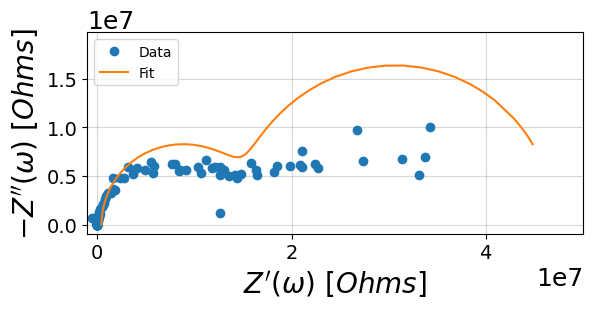

In [122]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.xlim(-1000000,50000000)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

In [123]:
print(circuit)


Circuit string: R0-p(R1,C1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 1.00e+00 [Ohm]
     R1 = 5.00e+05 [Ohm]
     C1 = 5.00e-07 [F]
     R2 = 1.00e+06 [Ohm]
     C2 = 5.00e-07 [F]

Fit parameters:
     R0 = 4.64e+05  (+/- 7.26e-23) [Ohm]
     R1 = 3.19e+07  (+/- 3.01e-24) [Ohm]
     C1 = 1.22e-07  (+/- 8.19e-09) [F]
     R2 = 1.46e+07  (+/- 7.64e-23) [Ohm]
     C2 = 7.36e-09  (+/- 1.84e-09) [F]

